In [5]:
import pandas as pd
import datetime
import time as time
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#from datetime import date, timedelta
from geopy.distance import distance
from multiprocessing import cpu_count

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("data/raw/turin_parking.csv")

In [ ]:
df_berlin = pd.read_csv("")

# Data Preparation

In [10]:
def colsPrep(df):
    df['duration'] = (df['final_time'] - df['init_time'])/3600
    df['init_date'] = df['init_time'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
    df['final_date'] = df['final_time'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
    df['init_hour'] = df['init_time'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%H'))
    df['final_hour'] = df['final_time'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%H'))
    return df

In [11]:
df = colsPrep(df)

In [12]:
df.head()

,city,init_time,final_time,loc.coordinates,init_date,duration,final_date,init_hour,final_hour
0,Torino,1517404040,1517404092,"[7.66493,45.06752]",2018-01-31,0.014444,2018-01-31,14,14
1,Torino,1517404040,1517404092,"[7.67557,45.06035]",2018-01-31,0.014444,2018-01-31,14,14
2,Torino,1517404040,1517404092,"[7.67919,45.06978]",2018-01-31,0.014444,2018-01-31,14,14
3,Torino,1517404040,1517404092,"[7.66362,45.0724]",2018-01-31,0.014444,2018-01-31,14,14
4,Torino,1517404040,1517404092,"[7.67673,45.0675]",2018-01-31,0.014444,2018-01-31,14,14


# Duration of parking

## Per hour - Start Hour

In [ ]:
# Per each car, insert filtered data

In [56]:
duration_ihour_turin = df.groupby(['init_hour'])['duration'].mean().rename_axis('hour').reset_index(name = 'duration')
duration_ihour_turin = pd.DataFrame(duration_ihour_turin)

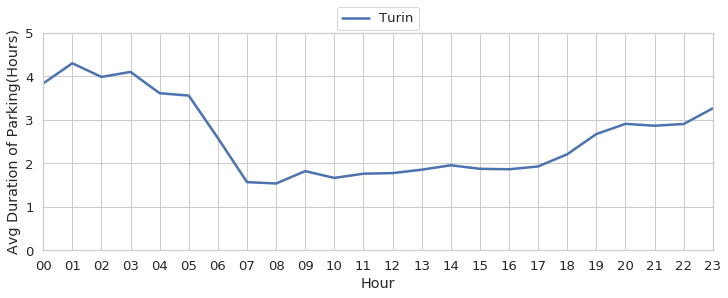

In [59]:
# PLot rentals per hour
x = duration_ihour_turin['hour']
y = duration_ihour_turin['duration']

sns.set(rc={'figure.figsize':(12,4)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

plt.xlim(0, 23)
plt.ylim(0, 5)
plt.xlabel("Hour")
plt.ylabel("Avg Duration of Parking(Hours)")

plt.plot(x,y, label ='Turin')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, )

## Per Hour - End Hour

In [30]:
duration_fhour_turin = df.groupby(['final_hour'])['duration'].mean().rename_axis('final_hour').reset_index(name = 'duration')
duration_fhour_turin = pd.DataFrame(duration_fhour_turin)

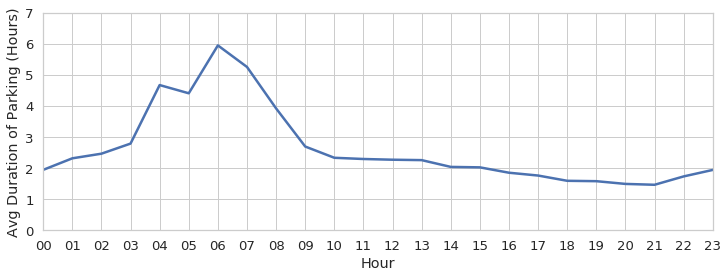

In [60]:
# PLot rentals per hour
x1 = duration_fhour_turin['final_hour']
y1 = duration_fhour_turin['duration']

sns.set(rc={'figure.figsize':(12,4)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

plt.xlim(0, 23)
plt.ylim(0, 7)
plt.xlabel("Hour")
plt.ylabel("Avg Duration of Parking (Hours)")

plt.plot(x1,y1)

#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=True)

## Per Hour - Accumulated

In [13]:
hours_dict = {'00': [0, 0], '01':[0,0], '02':[0,0], '03':[0,0], '04':[0,0], '05':[0,0], '06':[0,0],
         '07':[0,0], '08':[0,0], '09':[0,0], '10':[0,0], '11':[0,0], '12':[0,0],
        '13':[0,0], '14':[0,0], '15':[0,0], '16':[0,0], '17':[0,0], '18':[0,0],
         '19':[0,0], '20':[0,0], '21':[0,0], '22':[0,0], '23':[0,0]}

In [14]:
def getHourAccumulated(row):
    if row['init_date'] == row['final_date']:
        if row['init_hour'] == row['final_hour']:
            hours_dict[row['init_hour']][0] += (row['final_time'] - row['init_time'])/3600
            hours_dict[row['init_hour']][1] += 1
        else:
            for hour in hours_dict:
                t = str(str(row['init_date']) + " " + hour)
                timestamp = time.mktime(time.strptime(t, "%Y-%m-%d %H"))
                if timestamp > row['init_time'] and timestamp <= row['final_time']:
                    accumulated = (timestamp - row['init_time'])/3600
                    hours_dict[hour][0] += accumulated
                    hours_dict[hour][1] += 1
    elif row['init_date'] != row['final_date']:
        init_date = row['init_date'].split("-")
        final_date = row['final_date'].split("-")
        d1 = date(int(init_date[0]), int(init_date[1]), int(init_date[2])) # start date
        d2 = date(int(final_date[0]), int(final_date[1]), int(final_date[2]))  # end date
        delta = d2 - d1         # timedelta
        for i in range(delta.days + 1):
            for hour in hours_dict:
                t = str(str(d1 + timedelta(i)) + " " + hour)
                timestamp = time.mktime(time.strptime(t, "%Y-%m-%d %H"))
                if timestamp > row['init_time'] and timestamp <= row['final_time']:
                    accumulated = (timestamp - row['init_time'])/3600
                    hours_dict[hour][0] += accumulated
                    hours_dict[hour][1] += 1

In [15]:
df.apply(getHourAccumulated, axis = 1))

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
453882    None
453883    None
453884    None
453885    None
453886    None
453887    None
453888    None
453889    None
453890    None
453891    None
453892    None
453893    None
453894    None
453895    None
453896    None
453897    None
453898    None
453899    None
453900    None
453901    None
453902    None
453903    None
453904    None
453905    None
453906    None
453907    None
453908    None
453909    None
453910    None
453911    None
Length: 453912, dtype: object

In [180]:
hours_dict[df['init_hour'][0]][0] += (df['final_time'][0] - df['init_time'][0])

In [49]:
avg_acc = pd.DataFrame.from_dict(hours_dict, orient='index').reset_index()
avg_acc['acc'] = avg_acc[0]/avg_acc[1]
avg_acc = avg_acc.drop([0,1], axis = 1).rename(columns = {"index":"hour"}).sort_values("hour").reset_index(drop = True)

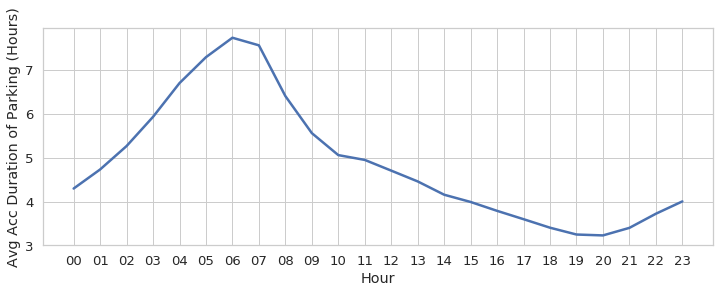

In [62]:
# PLot rentals per hour
x = avg_acc['hour']
y = avg_acc['acc']

sns.set(rc={'figure.figsize':(12,4)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

#plt.xlim(0, 23)
#plt.ylim(0, 7)
plt.xlabel("Hour")
plt.ylabel("Avg Acc Duration of Parking (Hours)")

plt.plot(x,y)

#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=True)


## Per weekday

In [63]:
duration_day_turin = pd.DataFrame(df.groupby(['init_date'])['duration'].mean())
duration_day_turin = duration_day_turin.reset_index().sort_values(["init_date"]).reset_index(drop=True)

In [64]:
duration_day_turin['init_weekday'] = duration_day_turin['init_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').weekday())

[Text(0, 0, 'Mon'),
 Text(0, 0, 'Tue'),
 Text(0, 0, 'Wed'),
 Text(0, 0, 'Thu'),
 Text(0, 0, 'Fri'),
 Text(0, 0, 'Sat'),
 Text(0, 0, 'Sun')]

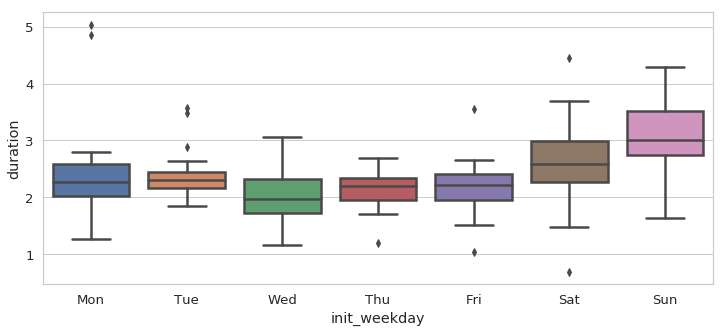

In [65]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

ax = sns.boxplot(x="init_weekday", y="duration", data=duration_day_turin)
ax.xaxis.set_ticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])